In [1]:
from agents.function_calling_agent import Agent as FuncAgent 
from agents.workflow_agent import Agent as WorkflAgent

import func_repository.repository as repository

from openai import OpenAI

from misc import decoder

import logging

logging.basicConfig(level=logging.INFO)


In [2]:
repo = repository.Repository()
repo.functions

[<function func_repository.descriptions.d_get_coordinates_by_city(city: str)>,
 <function func_repository.descriptions.d_get_current_weather(city: str)>,
 <function func_repository.descriptions.d_send_email_to(recipient: str, content: str, subject: str)>,
 <function func_repository.descriptions.d_store_text_to_disc(content: str, file_name: str)>,
 <function func_repository.descriptions.d_write_text(text_content: str, context_info: str) -> str>]

In [3]:
bagent = WorkflAgent(functions=repo.functions)
#response = agent.ask('What is the weather in Freiburg?')

In [4]:
bagent.chat_history

[{'role': 'system',
  'content': 'You are modeling a process workflow. You are given a textual description of a process workflow. \nThe aim is to return the workflow description as a directional graph.\nEvery described function from the text is mapped to a node. Keep the context of the function and include rather more information for one task.\nThe graph must be returned in a JSON representation. The key is the source node and the values are the target nodes stored in a list.\nI give some examples.\n\nExample 1:\nI would like to know how warm it is in Berlin. Put the information in an email. Afterwards send the to nick.reiter@hotmail.de  and store the email on the disk.\n{\n    "get the weather data of Berlin": ["write the email"],\n    "write the email": ["send the email to nick.reiter@hotmail.de", "store the email on the disk"],\n    "send the email to nick.reiter@hotmail.de": [],\n    "store the email on the disk": []\n\n}\n\nExample 2:\nGet the bank account statement of user max.mu

In [7]:
wagent.get_functions()


[{'name': 'd_get_coordinates_by_city',
  'description': 'provides coordinates of a given city',
  'parameters': {'type': 'object',
   'properties': {'city': {'description': 'name of the city',
     'type': 'string'}}},
  'required': ['city']},
 {'name': 'd_get_current_weather',
  'description': 'provides current weather data for a given city',
  'parameters': {'type': 'object',
   'properties': {'city': {'description': 'name of the city',
     'type': 'string'}}},
  'required': ['city']},
 {'name': 'd_send_email_to',
  'description': 'sends an email to a given recipient',
  'parameters': {'type': 'object',
   'properties': {'recipient': {'description': 'email address of the recipient',
     'type': 'string'},
    'content': {'description': 'content of the email to be sent',
     'type': 'string'},
    'subject': {'description': 'subject of the email to be sent',
     'type': 'string'}}},
  'required': ['recipient', 'content', 'subject']},
 {'name': 'd_store_text_to_disc',
  'descriptio

In [5]:
wagent = WorkflAgent(functions=repo.functions)

query = 'Get the weather data about berlin, write a love poem about the current weather. Afterwards store the poem in a txt file'
# query = '''When I send a worksheet of business lines through Web, deal with them according to which type of each business line belong to.
# 1. To-Customer: Send a message to Slack to report the proﬁts of business lines.
# 2. To-Business: Write a report which should analyze the data to give some suggestions and then send it to the Gmail of the corresponding managers.'''
output = wagent.run(query=query)
#wagent.execute()



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [9]:
wagent.response

'{\n    "get the weather data about berlin": ["write a love poem about the current weather"],\n    "write a love poem about the current weather": ["store the poem in a txt file"],\n    "store the poem in a txt file": []\n}'

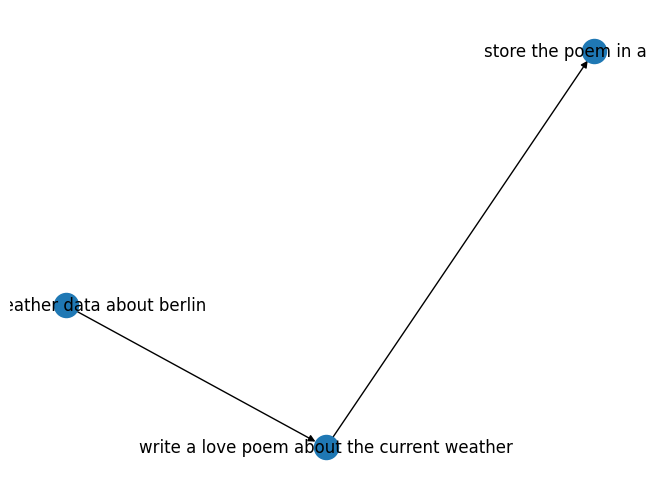

In [8]:
wagent.show_directed_graph()

In [9]:
functions = wagent.map_functions_to_str_representation()

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"

KeyboardInterrupt



In [15]:
wagent.mapping

{'get the weather data about Berlin': <function func_repository.descriptions.d_get_current_weather(city: str)>,
 'write a love poem about the current weather': <function func_repository.descriptions.d_get_current_weather(city: str)>,
 'store the poem in a txt file': <function func_repository.descriptions.d_store_text_to_disc(text: str, file_name: str)>}

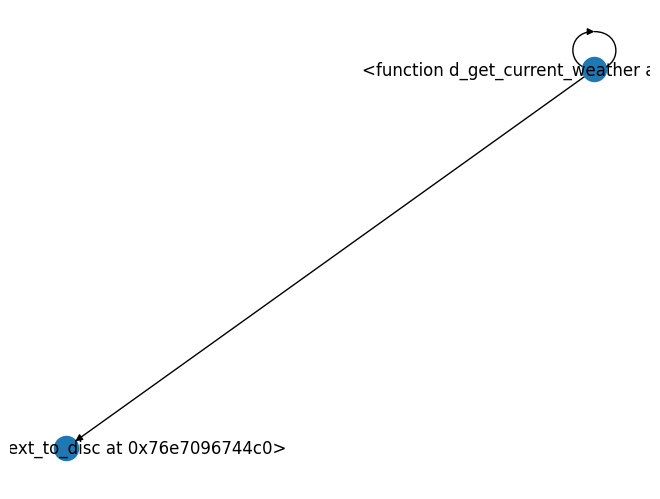

In [16]:
wagent.show_directed_graph(mode='mapping')

In [12]:
decoder.func_to_json(functions[0], 'arguments')

{'parameters': {'city': {'description': 'name of the city', 'type': 'string'}},
 'required': ['city']}

In [8]:
wagent = WorkflAgent(functions=repo.functions)
wagent.ask('Suche mir das Wetter für Berlin aus und sende die Informationen an nick.reiter@hotmail.de')
#wagent.ask('What is the capital of Germany')
#wagent.show_directed_graph()

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


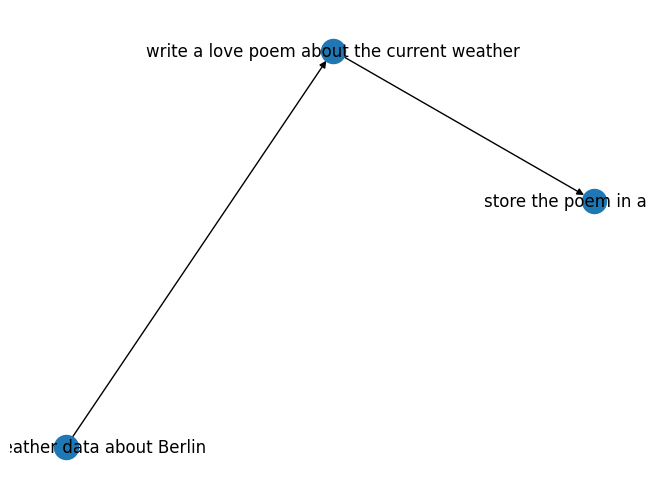

In [10]:
wagent.show_directed_graph()

In [7]:
with open('script.py', 'w') as f:
    f.write('print("Hello, World!")')

# Execute the script
import subprocess
subprocess.run(['python3', 'script.py'])

Hello, World!


CompletedProcess(args=['python3', 'script.py'], returncode=0)

In [16]:
from openai import OpenAI

import logging
logging.getLogger().setLevel(logging.CRITICAL)

client = OpenAI()

sys_message = '''You are a programmer that turns conditional statements into python functions
Only provide the main function in python code inlusive docstrings. No Explanation or comments are needed.
You are are given some examples of conditional statements and the expected output.

Example 1:
If the bank statement of the account is above 800€, then transfer the money to the savings account. If it is equal or below 800€, then abort the transaction.
def handle_finances(bank_statement: float):
    """conditional statements which decides the next action based on the bank statement of the account

    :param bank_statement: The bank statement of the account
    """
    if bank_statement > 800.00:
        transfer_money()
    else:
        abort transaction()

Example 2:
If the temperature is above 30°C, send an email to my the official. if it is between 20°C and 30°C, then send an email to my boss. If it is below 20°C, then send an email to my colleague.
def handle_temperature_alert(temperature: float):
    """conditional statements which decides the next action based on the temperature

    :param temperature: temperature in degree celsius
    """
    if temperature > 30.0:
        send_email_to_official()
    elif 20.0 <= temperature <= 30.0:
        send_email_to_boss()
    else:
        send_email_to_colleague()
'''

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": sys_message},
        {"role": "user", "content": "If the moisture is more than 30 percent write a love letter, if it is between 20 and 30 percent write a poem, if it is below 20 percent write a story."},
    ]
)

In [17]:
code = response.choices[0].message.content

with open('conditions.py', 'w') as f:
    f.write(code)

# Execute the script
import subprocess
# subprocess.run(['python3', 'script.py'])

In [1]:
import os
